# Task 2: Advanced Analysis of Brent Oil Prices

In this notebook, we will apply advanced statistical and econometric models to analyze the historical Brent oil prices dataset. Building upon our previous insights, we aim to identify patterns, understand how various factors influence oil prices, and examine potential models for accurate forecasting. This analysis includes:

- Advanced time series modeling (VAR, regime-switching models)
- Economic indicators and their relationship with oil prices
- LSTM-based models for detecting patterns in the data

In [17]:
# Importing essential libraries for Task 2 analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.api import VAR
# from sklearn.preprocessing import StandardScaler
import os
os.chdir(r'c:\users\ermias.tadesse\10x\Oil-Price-Insights\src\data_analysis')
from eda_utils import EDA

os.chdir(r'c:\users\ermias.tadesse\10x\Oil-Price-Insights')  # Set the working directory to the project root
# Load the Brent Oil Prices dataset
file_path = 'Data/Raw/BrentOilPrices.csv'
data = pd.read_csv(file_path)
data['Date'] = pd.to_datetime(data['Date'], format='mixed')
# data['Date'] = pd.to_datetime(data['Date'], format='%d-%b-%y')
data.set_index('Date', inplace=True)
data.head()

,Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63


## Exploratory Data Analysis (EDA)

To begin the advanced analysis, we’ll perform EDA on the Brent oil prices dataset. This step includes:

- Plotting historical trends in oil prices
- Calculating moving averages to observe longer-term trends
- Examining any seasonality or volatility in price data
- Exploring correlations with other economic indicators (to be added later)


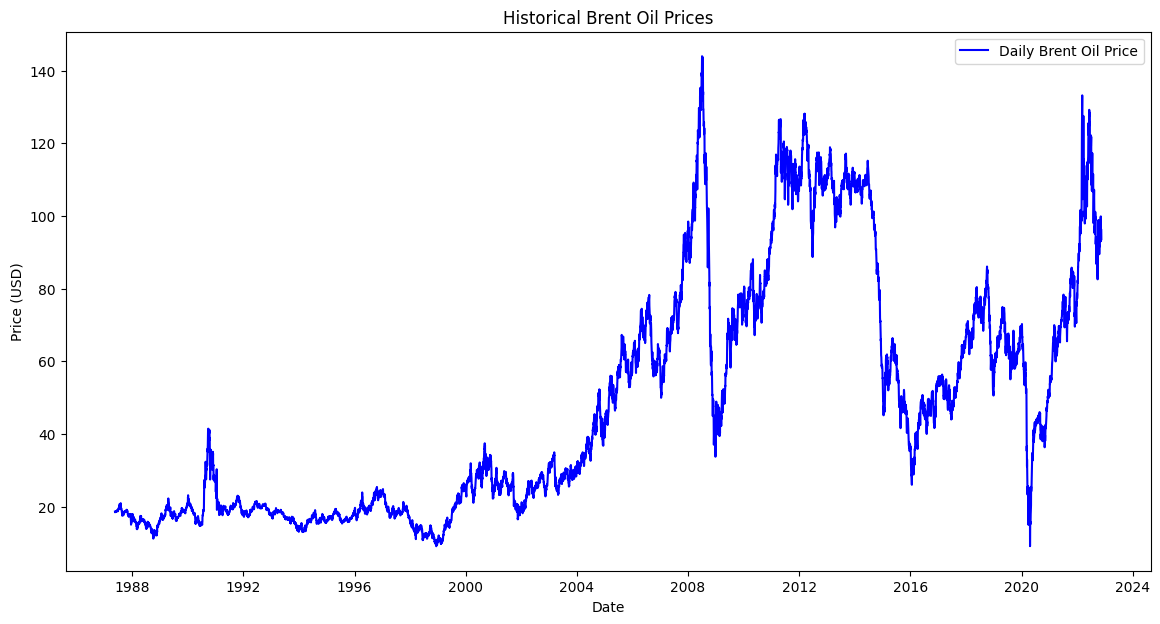

In [18]:
# Plotting Brent oil price over time to observe initial trends
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Price'], color='blue', label='Daily Brent Oil Price')
plt.title("Historical Brent Oil Prices")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

### Calculating and Plotting Moving Average

To observe the long-term trends in Brent oil prices, we will calculate a moving average. This helps smooth out daily fluctuations and highlights broader trends over time.


c:\users\ermias.tadesse\10x\Oil-Price-Insights


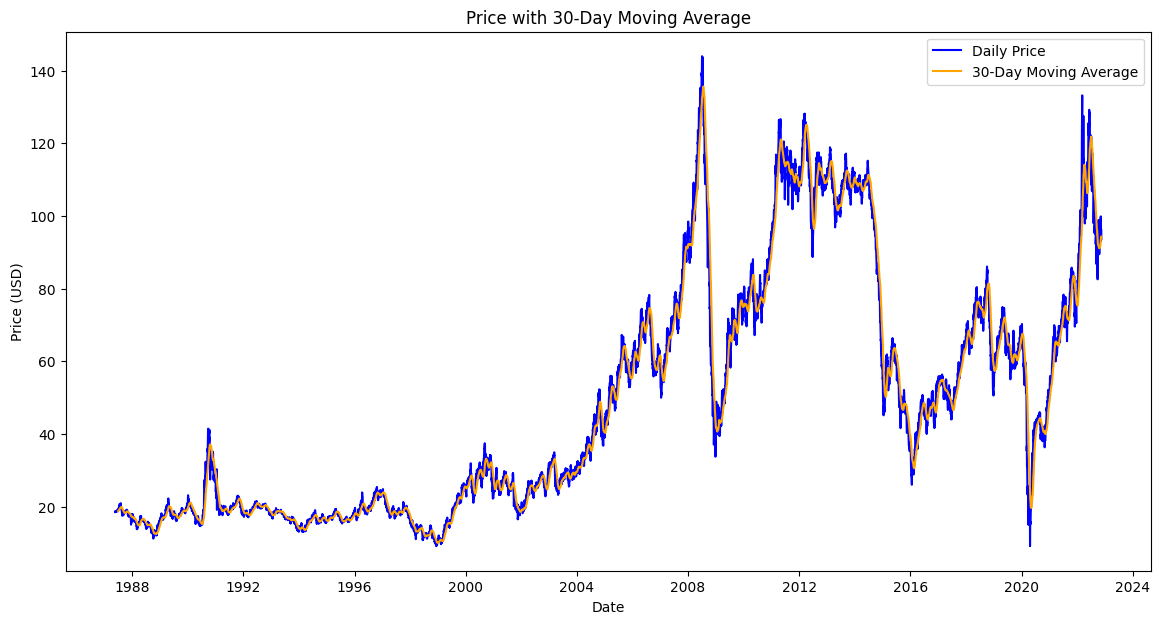

In [19]:
# Importing custom EDA utilities

# Import the EDA class
print(os.getcwd()) 


# Instantiate the EDA class with the data
eda = EDA(data)

# Plot the 30-day moving average using the class method
eda.plot_moving_average(column='Price', window=30)


### Seasonality and Volatility Analysis

To gain further insights into the Brent oil prices, we’ll decompose the data into seasonal, trend, and residual components and examine its volatility. This analysis helps identify recurring patterns and measure price fluctuations over time.

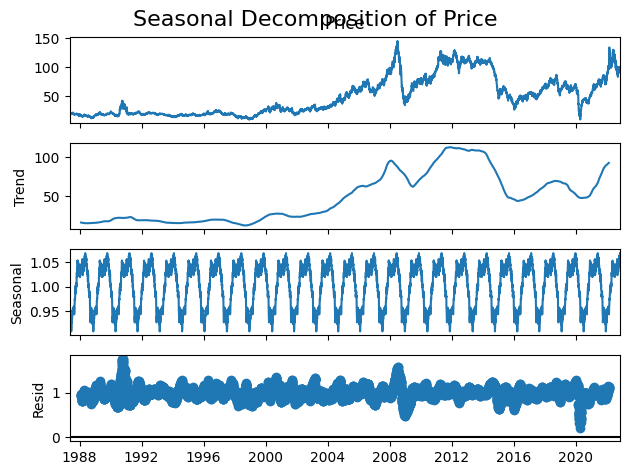

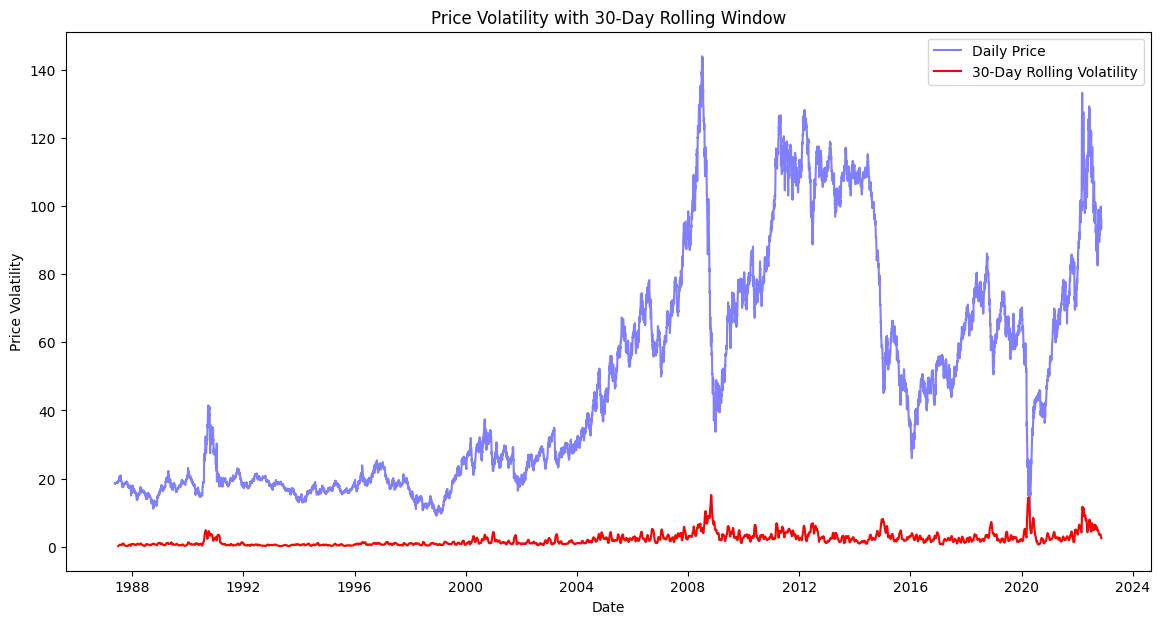

In [20]:
# Plot seasonal decomposition
eda.plot_seasonal_decomposition(column='Price', period=365)

# Plot volatility using a 30-day rolling window
eda.plot_volatility(column='Price', window=30)


### Event Data Integration and Correlation Analysis

In this step, we integrate significant historical events with the Brent oil price data. This integration allows us to observe how these events correlate with price changes. Events include economic crises, conflicts, and other significant global occurrences.

In [21]:
events_data = {
    "1986-08-01": "OPEC Production Cuts",
    "1990-08-02": "Gulf War",
    "1997-07-02": "Asian Financial Crisis",
    "2001-09-11": "September 11 Attacks",
    "2003-03-20": "Iraq War",
    "2008-09-15": "Global Financial Crisis",
    "2010-04-20": "Deepwater Horizon Oil Spill",
    "2011-02-15": "Arab Spring",
    "2014-06-01": "US Shale Boom",
    "2014-11-27": "OPEC Decision to Maintain Production Levels",
    "2016-01-16": "Iran Sanctions Lifted",
    "2020-03-20": "COVID-19 Pandemic",
    "2020-04-20": "Oil Price Crash",
    "2021-07-01": "Supply Shock and Price Surge",
}

# events_data = {
#     "2003-01-01": "Oil Price Boom",
#     "2014-01-01": "Post-2014 Volatility",
#     "2022-01-01": "2022 Predictions",
#     "2008-09-15": "Global Financial Crisis",
#     "2014-06-24": "Oil Price Drop",
#     "2020-03-20": "COVID-19 Pandemic",
#     "1990-08-02": "Gulf War",
#     "1997-07-02": "Asian Financial Crisis",
#     "2011-02-15": "Arab Spring",
#     "2021-07-01": "Supply Shock and Price Surge",
#     "1989-11-09": "Fall of the Berlin Wall",
#     "2001-09-11": "Terrorist Attacks on US",
#     "2003-03-20": "Invasion of Iraq by US Forces",
#     "2005-08-29": "Hurricane Katrina impacts US oil production",
#     "2008-07-11": "Record Oil Prices Hit $147 per Barrel",
#     "2011-02-15": "Libyan Civil War disrupts oil exports",
#     "2019-09-14": "Drone attack on Saudi oil facilities",
#     "2020-04-20": "Oil price crash; WTI futures turn negative",
#     "2022-02-24": "Russia invades Ukraine; oil prices spike",
#     "1987-10-19": "Black Monday stock market crash",
#     "1991-12-31": "End of the Soviet Union",
#     "1998-08-05": "Asian Financial Crisis impacts oil prices",
#     "2004-01-01": "OPEC agrees to production cuts",
#     "2006-07-12": "Israel-Lebanon conflict affects oil prices",
#     "2007-10-15": "OPEC maintains production quota",
#     "2009-01-01": "OPEC production cuts continue",
#     "2012-05-18": "Sanctions on Iran impact oil supply",
#     "2014-06-24": "Geopolitical tensions in Iraq",
#     "2015-11-30": "OPEC agrees to maintain production levels",
#     "2016-11-30": "OPEC Agreement to Cut Production",
#     "2017-01-20": "Trump inaugurated, affecting energy policies",
#     "2020-11-09": "Pfizer announces COVID-19 vaccine efficacy",
#     "2021-07-01": "OPEC+ agrees to gradually increase production",
# }

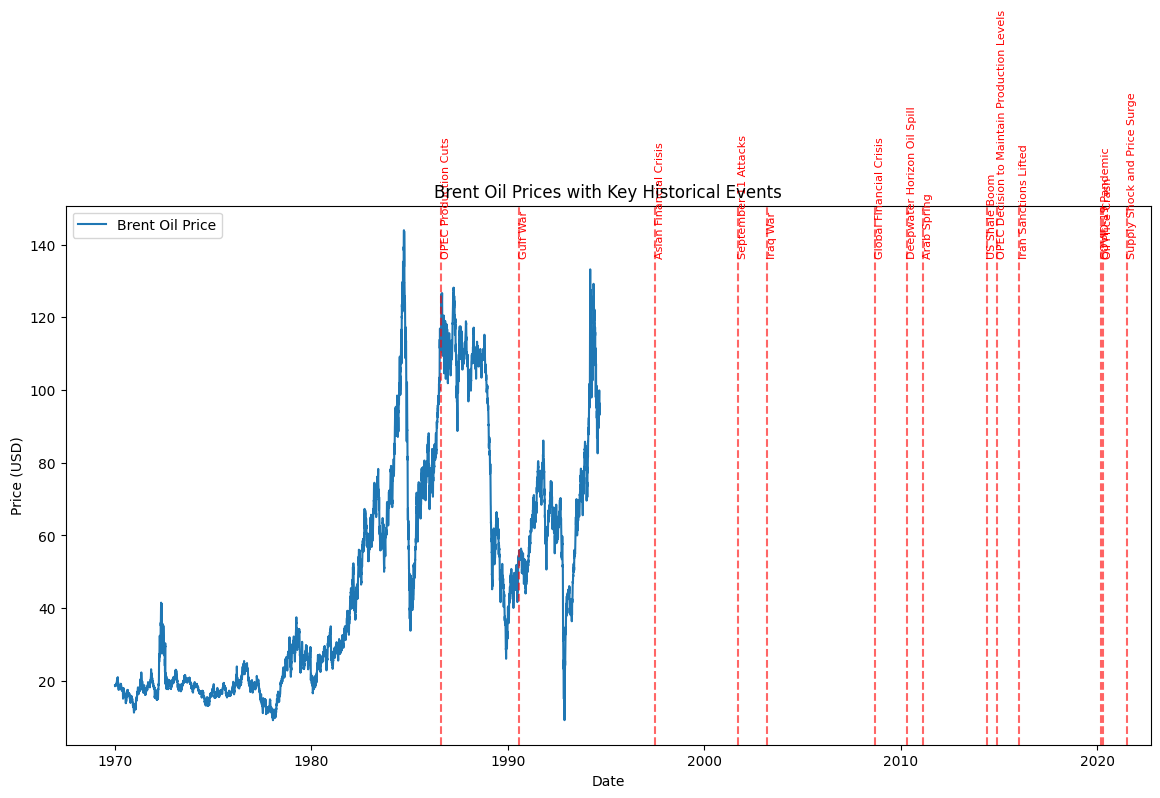

In [22]:
# Convert events_data to a DataFrame
events_df = pd.DataFrame(list(events_data.items()), columns=['Date', 'Event'])
events_df['Date'] = pd.to_datetime(events_df['Date'], format='%Y-%m-%d')

# Merge event data without affecting the main data’s date range
eda.merge_economic_data(events_df)

# Plot the data with annotations for each event, ensuring full data range is displayed
plt.figure(figsize=(14, 7))
plt.plot(eda.data['Price'], label='Brent Oil Price')

# Annotate key events with vertical lines and labels
for date, event in events_data.items():
    plt.axvline(pd.to_datetime(date), color='red', linestyle='--', alpha=0.6)
    plt.text(pd.to_datetime(date), eda.data['Price'].max() * 0.95, event, rotation=90, color='red', fontsize=8)

plt.title("Brent Oil Prices with Key Historical Events")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

### Event Impact Analysis

To understand the effect of major events on Brent oil prices, we’ll calculate the percentage change in oil prices around each event date. This analysis will reveal the market’s response to each significant event.

In [23]:
# Calculate and display the percentage change in price around each event
event_impacts_df = eda.calculate_event_impact(events_data, window=30)

# Display DataFrame to verify columns and data
display(event_impacts_df.head())

# Ensure that 'Event' and 'Percentage Change (%)' columns exist before plotting
if 'Event' in event_impacts_df.columns and 'Percentage Change (%)' in event_impacts_df.columns:
    # Plotting the percentage change for each event
    plt.figure(figsize=(12, 8))
    plt.bar(event_impacts_df['Event'], event_impacts_df['Percentage Change (%)'], color='skyblue')
    plt.title("Impact of Events on Brent Oil Prices (Percentage Change)")
    plt.xlabel("Event")
    plt.ylabel("Percentage Change (%)")
    plt.xticks(rotation=90)
    plt.show()
else:
    print("Expected columns 'Event' and 'Percentage Change (%)' not found in DataFrame.")
    

Data unavailable around OPEC Production Cuts due to missing date
Data unavailable around Gulf War due to missing date
Data unavailable around Asian Financial Crisis due to missing date
Data unavailable around September 11 Attacks due to missing date
Data unavailable around Iraq War due to missing date
Data unavailable around Global Financial Crisis due to missing date
Data unavailable around Deepwater Horizon Oil Spill due to missing date
Data unavailable around Arab Spring due to missing date
Data unavailable around US Shale Boom due to missing date
Data unavailable around OPEC Decision to Maintain Production Levels due to missing date
Data unavailable around Iran Sanctions Lifted due to missing date
Data unavailable around COVID-19 Pandemic due to missing date
Data unavailable around Oil Price Crash due to missing date
Data unavailable around Supply Shock and Price Surge due to missing date


""


Expected columns 'Event' and 'Percentage Change (%)' not found in DataFrame.
